In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [2]:
data=pd.read_csv('data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

#### code to check all the missing values in my dataset

In [4]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
data.dropna(inplace=True)

<Axes: xlabel='strength', ylabel='count'>

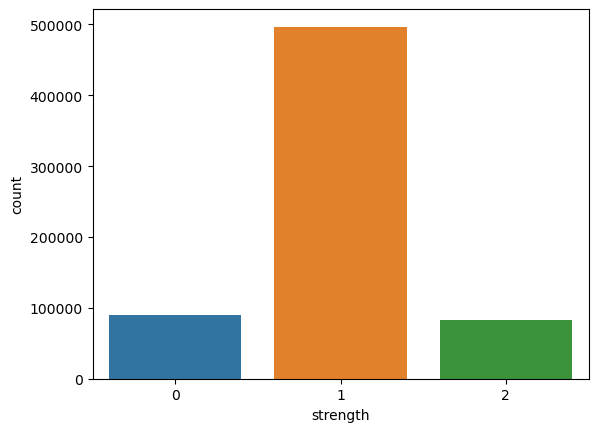

In [6]:
sns.countplot(data=data,x='strength')

In [7]:
password_tuple=np.array(data)

In [8]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### shuffling randomly for robustness

In [9]:
import random
random.shuffle(password_tuple)

In [10]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


#### create a custom function to split input into characters of list

In [11]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

#### import TF-IDF vectorizer to convert String data into numerical data

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### apply TF-IDF vectorizer on data

In [14]:
X=vectorizer.fit_transform(x)

In [15]:
X.shape

(669639, 131)

In [17]:
vectorizer.get_feature_names_out()

array(['\x04', '\x05', '\x06', '\x08', '\x0e', '\x10', '\x12', '\x16',
       '\x17', '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$',
       '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[',
       '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
       'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81',
       '\x8d', '\xa0', '¡', '¨', '«', '°', '±', '²', '³', '´', 'µ', '·',
       'º', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'è',
       'é', 'ê', 'í', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù',
       'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'œ', '—', '‚', '…', '‹', '›'],
      dtype=object)

In [18]:
first_document_vector=X[0]
first_document_vector

<1x131 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [19]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56643359],
        [0.        ],
        [0.59170166],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [21]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591702
5,0.566434
z,0.336154
k,0.292018
d,0.286013
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape

(535711, 131)

In [25]:
from sklearn.linear_model import LogisticRegression

#### Apply Logistic on data as use-cas is Classification

In [26]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [27]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

#### doing prediction on X-Test data

In [28]:
y_pred=clf.predict(X_test)
y_pred

array([1, 2, 1, ..., 1, 1, 1])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5233 12749    16]
 [ 3641 93282  2588]
 [   50  5068 11301]]
0.8199629651753181


##### create report of your model

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39     17998
           1       0.84      0.94      0.89     99511
           2       0.81      0.69      0.75     16419

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [32]:
from ydata_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='Password_Strength.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
import pickle
pickle.dump(clf,open('Password_Strength_model.pkl','wb'))